# Work on timepending variable, using two weeks of data
(08/25/23-09/07/23), code reference date: 11/20/23
### Separately created master_finalized_txns_limited.csv 
### from master_finalized_txns.csv.gz (which Tara created)
(status in (confirmed, failed))
### Remove rows where timepending is missing, or timepending = 0
### Generate summary statistics, histogram for timepending


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import scipy

#import gzip

In [2]:
from pathlib import Path

# Data folder location

##### ADD DATA FILE LOCATION ####

#read in TWO WEEK, trimmed and finalized, LIMITED mempool data set

limited_df = data_folder/'master_finalized_txns_limited.csv'
df = pd.read_csv(limited_df)


df = df.loc[: , ['basefeepergas', 'maxpriorityfeepergas', 'maxfeepergas', 'timepending', 'blockspending']]
df.shape



(10505807, 5)

In [ ]:
#df.head()

In [3]:
del limited_df
#del df3
#del df2
#del df9
#del df10

In [ ]:
df.blockspending.describe()

In [ ]:
#NOTE: There is not complete overlap between where timepending = 0 and where blockspending = 0
#df.blockspending[df.timepending != 0].describe()
#df.timepending[df.blockspending !=0].describe()

## Remove rows where blockspending is missing, and where timepending = 0
timepending=0 indicates a private transaction

In [ ]:
#del df2
#del df3

In [5]:
#Remove rows where timepending is 0, or is Nan
df2 = df.dropna( how = 'all', subset=['blockspending'])
df2.shape

df3 = df2[df2['timepending'] != 0]
df3.shape

(10176150, 5)

In [6]:
#find 99th percentile for blockspending
#(NOTE: percentile function was not working before with timepending: rows with missing timepending had not been removed)
#np.nanpercentile(df3['timepending'], 99)

x = np.percentile(df3['blockspending'], 99)
x

22.0

In [8]:
#This dataframe is for creating histograms without the extremely long right tail
df10  = df3[df3['blockspending']<x]

## Blockspending Plot and summary statistics

### Blockspending

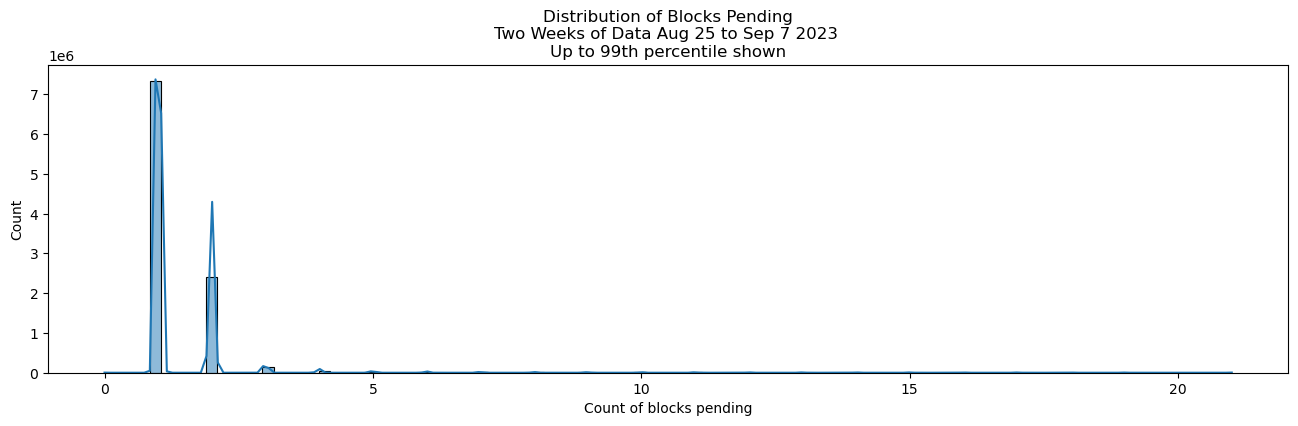

In [9]:
#Plot of blockspending that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['blockspending'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Blocks Pending\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Count of blocks pending')
plt.show()

In [10]:
#NOTE: df3 has all finalized rows from the trimmed two week data set 
#          omitting missing values and timepending=0 (appropriate for summary statistics), 
#     d10 excludes the top 1% of timepending values (for the histogram only)
df3['blockspending'].describe()

count    1.017615e+07
mean     2.933598e+01
std      4.468695e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.278693e+06
Name: blockspending, dtype: float64